In [3]:
%load_ext cython 

In [4]:
%%cython 
import numpy as np
cimport numpy as np   


cdef float f(float r,float x):
  return 4*r*x*(1-x)

cdef log(float r,float x,int steps,float (*f)(float,float)):
    cdef np.ndarray[np.float64_t, ndim=1] l=np.zeros(steps)
    cdef int i
    for i in range(steps):
        l[i]=x
        x=f(r,x)
    return l

r=np.arange(0,0.25,0.01)
r=np.append(r,np.arange(0.25,0.75,0.001))
r=np.append(r,np.arange(0.75,1,0.00001))
r=np.array(r)

cdef float x0=0.3
cdef int relax_steps=20000
cdef int steps=1000
data=np.zeros((steps,np.shape(r)[0]))
cdef int counter=0
cdef int N=int(np.shape(r)[0])
cdef float x=0
for counter in range(N):
    x=x0
    l=log(r[counter],x,relax_steps,f)
    x=l[-1]
    l=log(r[counter],x,steps,f)
    data[:,counter]=l
    counter+=1


In [ ]:
print(np.shape(data))

(1000, 25525)


In [5]:
points=[]
N=int(np.shape(r)[0])
for i in range(N):
    l=list(set(data[900:,i]))
    u=[(r[i],x) for x in l]
    points.extend(u)

x,y=zip(*points)

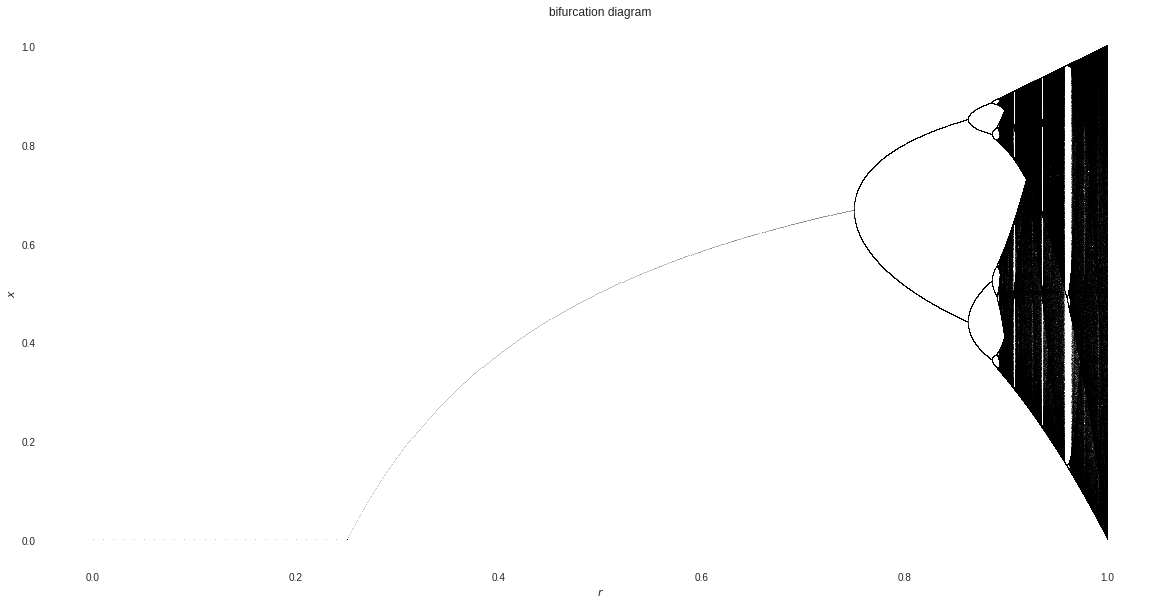

In [7]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.style.use('seaborn')
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot()
ax.grid(False)
ax.set_facecolor('w')
ax.plot(x,y,',k',alpha=0.25)
ax.set_title('bifurcation diagram')
ax.set_xlabel('$r$')
ax.set_ylabel('$x$')
plt.savefig('bi-tree1.png',bbox_inches='tight')

In [29]:
points=[]
R=r[r>0.96]
Nprime=int(np.shape(R)[0])
delta=N-Nprime
for i in range(Nprime):
    l=list(set(data[900:,i+delta-1]))
    u=[(R[i],x) for x in l]
    points.extend(u)

x,y=zip(*points)

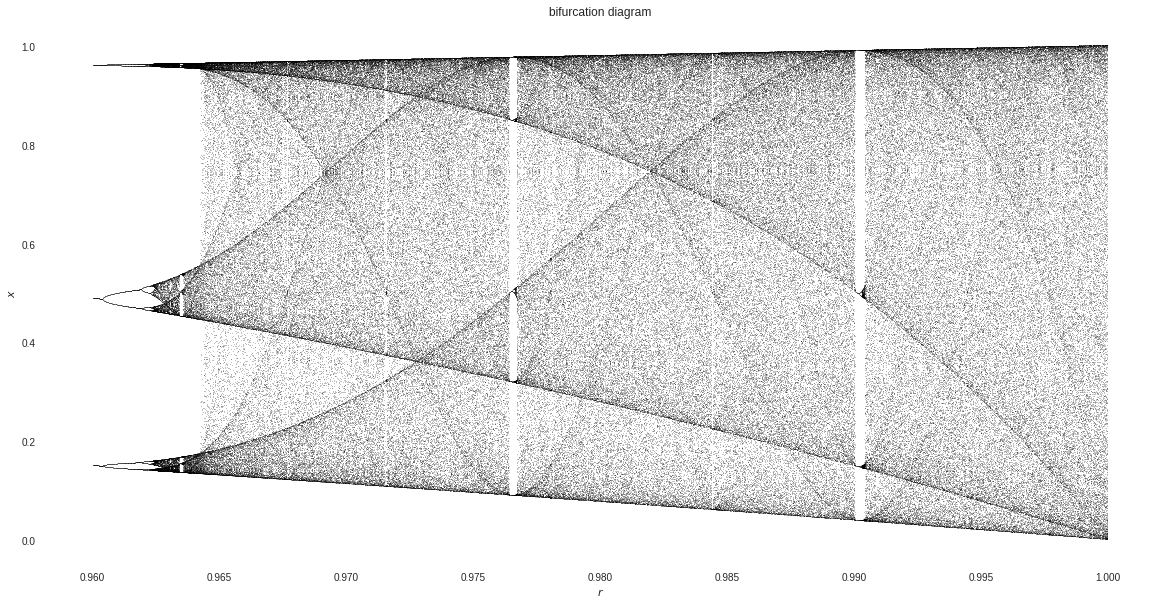

In [30]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot()
ax.grid(False)
ax.set_facecolor('w')
ax.plot(x,y,',k',alpha=0.25)
#plt.plot(np.linspace(0.7,1,3),[0.50]*3,'r--')
ax.set_title('bifurcation diagram')
ax.set_xlabel('$r$')
ax.set_ylabel('$x$')
plt.savefig('bi-tree4.png')

In [31]:
r_bi=[]
temp=2
for i in range(N):
    l=list(set(data[:,i]))
    l=list(set(['%.4f'%p for p in l]))
    if len(l)==temp and len(l)<=32:
        temp*=2 
        r_bi.append(r[i])
    if len(l)>100:
        chaos=i
        break 
#r_bi=['%.4f'%p for p in r_bi]
print('bifurcation points:',r_bi)
print('chaos:%0.4f'%r[chaos])
print('delta= %.3f'%((r_bi[1]-r_bi[0])/(r_bi[2]-r_bi[1])))

bifurcation points: [0.75, 0.86205999999949, 0.886009999999381, 0.8911099999993578, 0.8921999999993528]
chaos:0.8925
delta= 4.679


In [32]:
temp=2
xm=0.4895
alpha=[]
for i in range(N):
    l=list(set(data[:,i]))
    l=list(set(['%.4f'%p for p in l]))
    l.sort()
    if len(l)==temp and len(l)<=4:
      for item in l:
        if abs(float(item)-xm)<0.01:
          print(l)
          alpha.append(abs(float(l[0])-float(l[1])))
          #print(l)
          #print('r:',i)
          #bool=1
          temp*=2 
          break
    if temp==8:
      break
print('alpha=%0.4f'%(alpha[1]/alpha[0]))

['0.4994', '0.8094']
['0.4020', '0.4796', '0.8344', '0.8663']
alpha=0.2503
